In [1]:
import numpy as np
import pandas as pd
from datetime import date, timedelta
import os
import random
import matplotlib.pyplot as plt
from tqdm import tqdm
from scipy.stats import skew, kurtosis

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from tensorflow.keras import layers,Sequential,losses,optimizers,datasets

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import *
from tensorflow.keras.models import *
from tensorflow.keras.optimizers import *
from tensorflow.keras.callbacks import *
from tensorflow.keras import backend as K

os.environ["CUDA_VISIBLE_DEVICES"] = "1"
tf.config.list_physical_devices('GPU')

[]

In [2]:
import tensorflow as tf

class CorrelationLayer(tf.keras.layers.Layer):
    def __init__(self):
        super(CorrelationLayer, self).__init__()

    def call(self, x):
        # Compute mean and standard deviation for each batch and node
        mean = tf.reduce_mean(x, axis=1, keepdims=True)
        std = tf.math.reduce_std(x, axis=1, keepdims=True)

        # Compute centered inputs
        x_centered = x - mean

        # Compute covariance matrix for each batch and node
        covariance_matrix = tf.matmul(x_centered, x_centered, transpose_b=True)

        # Compute correlation matrix using covariance matrix and standard deviation
        correlation_matrix = tf.divide(covariance_matrix, tf.matmul(std, std, transpose_b=True))

        # Compute Laplacian transformation of correlation matrix
        laplacian_transform = self.localpooling_filter(correlation_matrix)

        return laplacian_transform

    def localpooling_filter(self, matrix):
        # Compute diagonal degree matrix
        degree_matrix = tf.linalg.diag(tf.reduce_sum(matrix, axis=1))

        # Compute graph Laplacian
        laplacian_matrix = degree_matrix - matrix

        # Compute Laplacian eigenvectors and eigenvalues
        eigenvalues, eigenvectors = tf.linalg.eigh(laplacian_matrix)

        # Compute Laplacian Fourier Transform
        laplacian_transform = tf.matmul(eigenvectors, tf.matmul(tf.linalg.diag(eigenvalues), eigenvectors, adjoint_b=True))

        return laplacian_transform



In [3]:
### IMPORT SPEKTRAL CLASSES ###

from spektral_utilities import *
from spektral_gcn import GraphConv

In [4]:
import scipy.io as scio
import pandas as pd

#input
feature1 = r'\Traning and Test\ACC_EW.mat'
data1 = scio.loadmat(feature1)
AA=data1['ACC_EW']
A=AA[:,0:300]

feature2 = r'\Traning and Test\ACC_NS.mat'
data2 = scio.loadmat(feature2)
BB=data2['ACC_NS']
B=BB[:,0:300]

feature3 = r'\Traning and Test\ACC_UD.mat'
data3 = scio.loadmat(feature3)
CC=data3['ACC_UD']
C=CC[:,0:300]

feature4 = r'\Traning and Test\DIS_EW.mat'
data4 = scio.loadmat(feature4)
DD=data4['DIS_EW']
D=DD[:,0:300]

feature5 = r'\Traning and Test\DIS_NS.mat'
data5 = scio.loadmat(feature5)
EE=data5['DIS_NS']
E=EE[:,0:300]

feature6 = r'\Traning and Test\DIS_UD.mat'
data6 = scio.loadmat(feature6)
FF=data6['DIS_UD']
F=FF[:,0:300]

feature7 = r'\Traning and Test\VEL_EW.mat'
data7 = scio.loadmat(feature7)
GG=data7['VEL_EW']
G=GG[:,0:300]

feature8 = r'\Traning and Test\VEL_NS.mat'
data8 = scio.loadmat(feature8)
HH=data8['VEL_NS']
H=HH[:,0:300]

feature9 = r'\Traning and Test\VEL_UD.mat'
data9 = scio.loadmat(feature9)
II=data9['VEL_UD']
I=II[:,0:300]


label = pd.read_csv(open(r'\KnowledgeBase\PGV\Features3s.csv',encoding='UTF-8'))

In [5]:
raw_data1=np.hstack((A,B))
raw_data2=np.hstack((raw_data1,C))
raw_data3=np.hstack((raw_data2,D))
raw_data4=np.hstack((raw_data3,E))
raw_data5=np.hstack((raw_data4,F))
raw_data6=np.hstack((raw_data5,G))
raw_data7=np.hstack((raw_data6,H))
x_data=np.hstack((raw_data7,I))

print(x_data.shape)


y_data=label.iloc[:,[0,1,2,3,4,5,6,7,8,9,10]].values  #知识嵌入
#y_data=label.iloc[:,[12]].values    #导入数据  iloc通过行号获取行数据
print(y_data[0])
print(y_data.shape)

(18067, 2700)
[-3.11349585 -1.6162357  -1.1193538  -3.59711571 -1.39303892 -5.72870579
  0.60858381  0.37864947 -0.95081472  1.30721834 -1.25808251]
(18067, 11)


In [6]:
#训练测试集
#x_data_train_test=x_data[0:23432]
#y_data_train_test=y_data[0:23432]
#print(x_data_train_test.shape)
#print(y_data_train_test.shape)
#震例
#x_data_zhenli=x_data[23432:27361]
#y_data_zhenli=y_data[23432:27361]
#print(x_data_zhenli.shape)
#print(y_data_zhenli.shape)


In [7]:
from sklearn.model_selection import train_test_split  #random_state=21  24  26  27  65
train_xx, test_xx, train_y1, test_y1 = train_test_split(x_data, y_data, test_size=0.2, random_state=30)
#print(train_xx.shape)   30 17.14  0.59
#print(test_xx.shape)

In [8]:
train_y=train_y1[:,[10]]
train_physics=train_y1[:,[0,1,2,3,4,5,6,7,8,9]]
print(train_y.shape)
print(train_y[0])

print(train_physics.shape)
print(train_physics[0])



test_y=test_y1[:,[10]]
test_physics=test_y1[:,[0,1,2,3,4,5,6,7,8,9]]
print(test_y.shape)
print(test_y[0])

print(test_physics.shape)
print(test_physics[0])

(14453, 1)
[-0.90576334]
(14453, 10)
[-2.86703925 -1.73043704 -1.08644753 -2.9644417  -0.98313256 -4.61410526
  1.02345287  0.52351466 -0.73253894  1.30850344]
(3614, 1)
[-0.42881059]
(3614, 10)
[-1.92127329 -1.0170204  -0.08808089 -1.37351168  0.35533502 -2.13072095
  2.35732444  1.36126256  0.32020884  1.08595852]


In [9]:
train_x=[]
for i in range(len(train_xx)):
    train_x.append(np.array(train_xx[i].reshape(9,1,300)).T)

In [10]:
test_x=[]
for i in range(len(test_xx)):
    test_x.append(np.array(test_xx[i].reshape(9,1,300)).T)

In [11]:
train_x=np.array(train_x)
test_x=np.array(test_x)

In [12]:
#3#  ##Reshaping
train_x = np.reshape(train_x, (train_x.shape[0], 300, 9))
test_x = np.reshape(test_x, (test_x.shape[0], 300, 9))
print("0",train_x.shape[0])
print("1",train_x.shape[1])
print(train_x.shape)
#print(train_x)

0 14453
1 300
(14453, 300, 9)


In [13]:
from keras import backend as K
from keras.engine.topology import Layer
class Self_Attention(Layer):
 
    def __init__(self, output_dim, **kwargs):
        self.output_dim = output_dim
        super(Self_Attention, self).__init__(**kwargs)
 
    def build(self, input_shape):
        # 为该层创建一个可训练的权重
        #inputs.shape = (batch_size, time_steps, seq_len)
        self.kernel = self.add_weight(name='kernel',
                                      shape=(3,input_shape[2], self.output_dim),
                                      initializer='uniform',
                                      trainable=True)
 
        super(Self_Attention, self).build(input_shape)  # 一定要在最后调用它
 
    def call(self, x):
        WQ = K.dot(x, self.kernel[0])
        WK = K.dot(x, self.kernel[1])
        WV = K.dot(x, self.kernel[2])
 
        print("WQ.shape",WQ.shape)
 
        print("K.permute_dimensions(WK, [0, 2, 1]).shape",K.permute_dimensions(WK, [0, 2, 1]).shape)
 
 
        QK = K.batch_dot(WQ,K.permute_dimensions(WK, [0, 2, 1]))
 
        QK = QK / (64**0.5)
 
        QK = K.softmax(QK)
 
        print("QK.shape",QK.shape)
 
        V = K.batch_dot(QK,WV)
 
        return V
 
    def compute_output_shape(self, input_shape):
 
        return (input_shape[0],input_shape[1],self.output_dim)

    def get_config(self):  #在有自定义网络层时，需要保存模型时，重写get_config函数
        config = {"output_dim": self.output_dim}
        base_config = super(Self_Attention, self).get_config()
        return dict(list(base_config.items()) + list(config.items()))

In [14]:
print(train_x.shape[1])

300


In [15]:
seed=50
#50 17.20 1.32

def get_model():

    #opt = Adam(lr=0.001)

    #inp_seq = tf.keras.layers.Input((sequence_length, 10))  #sequence_length = 14; 表示输入的序列长度是14; 14*10
#    inp_lap = tf.keras.layers.Input((9, 9))  #输入的领接矩阵 10表示节点数
    
    inp = tf.keras.layers.Input((300,9))  #如果我用CNN提取特征？？  

    feat = tf.keras.layers.Conv1D(32,kernel_size=4,strides=2,    #   32  15.76 0.65  33.68 0.302
                  kernel_initializer=keras.initializers.he_normal(seed=seed),\
                  bias_initializer=keras.initializers.he_normal(seed=seed),\
                  input_shape = (300,9),padding="same")(inp)
    feat = tf.keras.layers.ReLU()(feat)
    feat = tf.keras.layers.BatchNormalization()(feat) 
    feat = tf.keras.layers.MaxPooling1D(pool_size=2,strides=2,padding="same")(feat)
    feat = tf.keras.layers.Dropout(rate=0.2)(feat)  # 
    
    
    feat = tf.keras.layers.Conv1D(64,kernel_size=4,strides=2,   # 32  
                  kernel_initializer=keras.initializers.he_normal(seed=seed),\
                  bias_initializer=keras.initializers.he_normal(seed=seed),\
                  padding="same")(feat) 
    feat = tf.keras.layers.ReLU()(feat)
    feat = tf.keras.layers.BatchNormalization()(feat) 
    feat = tf.keras.layers.MaxPooling1D(pool_size=2,strides=2,padding="same")(feat) # 高宽各减半的池化层
    feat = tf.keras.layers.Dropout(rate=0.2)(feat)  # 
    
    feat = tf.keras.layers.Conv1D(128,kernel_size=4,strides=2,   # 32  
                  kernel_initializer=keras.initializers.he_normal(seed=seed),\
                  bias_initializer=keras.initializers.he_normal(seed=seed),\
                  padding="same")(feat) 
    feat = tf.keras.layers.ReLU()(feat)
    feat = tf.keras.layers.BatchNormalization()(feat) 
    feat = tf.keras.layers.MaxPooling1D(pool_size=2,strides=2,padding="same")(feat) # 高宽各减半的池化层
    feat = tf.keras.layers.Dropout(rate=0.2)(feat)  #     


    
    cor1 = CorrelationLayer()(feat)  #
    x = GraphConv(64, activation='relu',kernel_initializer=tf.keras.initializers.he_normal(seed=seed))([feat, cor1]) #包含了节点特征

    cor2 = CorrelationLayer()(x)    
    x = GraphConv(32, activation='relu',kernel_initializer=tf.keras.initializers.he_normal(seed=seed))([x, cor2]) #包含了节点特征


    


    x = Self_Attention(8)(x) # 8
    x = Flatten()(x)
        

    
    x = Dense(256, activation='relu')(x)
    x = Dense(128, activation='relu')(x)   
    x = Dense(64, activation='relu')(x) #64
    x = Dense(50, activation='relu')(x)  #50  正在调整
    x = Dense(30, activation='relu')(x) #30


    out = Dense(1)(x)

    #model = Model([inp_seq, inp_lap, inp_feat], out)  ,inpt2
    rms = optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-08)
    model = Model(inp, out)
    model.compile(optimizer = rms, loss = 'mean_squared_error')

    return model

In [16]:
model = get_model()
model.summary() 

WQ.shape (None, 5, 8)
K.permute_dimensions(WK, [0, 2, 1]).shape (None, 8, 5)
QK.shape (None, 5, 5)
Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 300, 9)]     0                                            
__________________________________________________________________________________________________
conv1d (Conv1D)                 (None, 150, 32)      1184        input_1[0][0]                    
__________________________________________________________________________________________________
re_lu (ReLU)                    (None, 150, 32)      0           conv1d[0][0]                     
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 150, 32)      128         re_lu[0][0]           

In [17]:
### TRAIN A MODEL FOR EACH STORES USING ALL THE DATA AVAILALBE FROM OTHER STORES ###


tf.random.set_seed(seed)
os.environ['PYTHONHASHSEED'] = str(33)
np.random.seed(seed)
random.seed(seed)

session_conf = tf.compat.v1.ConfigProto(
    intra_op_parallelism_threads=1, 
    inter_op_parallelism_threads=1
)
sess = tf.compat.v1.Session(
    graph=tf.compat.v1.get_default_graph(), 
    config=session_conf
)
tf.compat.v1.keras.backend.set_session(sess)

pred_train_all=np.zeros(train_y.shape)
pred_test_all = np.zeros(test_y.shape)
#pred_zhenli_all = np.zeros(y_zhenli.shape)

    
#es = EarlyStopping(patience=10, verbose=1, min_delta=0.001, monitor='val_loss', mode='auto', restore_best_weights=True)


In [18]:
from keras.callbacks import EarlyStopping
from keras.callbacks import ReduceLROnPlateau
lr_reducer = ReduceLROnPlateau(monitor="val_loss",
                               factor=0.1,
                                cooldown= 0,
                                patience= 5,
                                min_lr=0.1e-7)
early_stopping_monitor = EarlyStopping(monitor= 'val_loss', patience = 10) #10  17.20 1.32
callbacks = [lr_reducer, early_stopping_monitor]




model = get_model()
model.fit(train_x, train_y, epochs=300, batch_size=256,  
            validation_split=0.1, callbacks=callbacks)  #256 ,train_physics  ,test_physics ,train_physics

pred_train_all = model.predict(train_x).ravel()
pred_test_all = model.predict(test_x).ravel()  ##ravel() 转换成1列


#pred_valid_all = scaler_seq.inverse_transform(pred_valid_all)
#reverse_valid = scaler_seq.inverse_transform(y_valid)
#pred_test_all = scaler_seq.inverse_transform(pred_test_all)
#reverse_test = scaler_seq.inverse_transform(y_test)

WQ.shape (None, 5, 8)
K.permute_dimensions(WK, [0, 2, 1]).shape (None, 8, 5)
QK.shape (None, 5, 5)
Epoch 1/300
WQ.shape (None, 5, 8)
K.permute_dimensions(WK, [0, 2, 1]).shape (None, 8, 5)
QK.shape (None, 5, 5)
WQ.shape (None, 5, 8)
K.permute_dimensions(WK, [0, 2, 1]).shape (None, 8, 5)
QK.shape (None, 5, 5)
51/51 [==============================] - ETA: 0s - loss: 0.3219WQ.shape (None, 5, 8)
K.permute_dimensions(WK, [0, 2, 1]).shape (None, 8, 5)
QK.shape (None, 5, 5)
51/51 [==============================] - 4s 83ms/step - loss: 0.3219 - val_loss: 0.1973
Epoch 2/300
51/51 [==============================] - 5s 90ms/step - loss: 0.1681 - val_loss: 0.1757
Epoch 3/300
51/51 [==============================] - 5s 102ms/step - loss: 0.1555 - val_loss: 0.1590
Epoch 4/300
51/51 [==============================] - 5s 94ms/step - loss: 0.1472 - val_loss: 0.1341
Epoch 5/300
51/51 [==============================] - 5s 96ms/step - loss: 0.1382 - val_loss: 0.1375
Epoch 6/300
51/51 [=====================

训练标准差STD= 0.29805385223574665
训练误差均值MEAN= -0.10494248689823615
训练平均绝对误差MAE= 0.23893516291155556
训练RMSE= 0.3159889624479861
训练MAPE= 166.43545794188765
训练r2 score: 0.5903421477199735


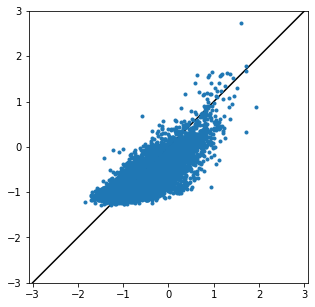

In [19]:
from sklearn import metrics
from sklearn.metrics import r2_score
print("训练标准差STD=",np.std(pred_train_all-train_y.ravel()))
print("训练误差均值MEAN=",np.mean(pred_train_all-train_y.ravel()))
print("训练平均绝对误差MAE=",metrics.mean_absolute_error(pred_train_all, train_y.ravel()))
print("训练RMSE=",metrics.mean_squared_error(pred_train_all, train_y.ravel())**0.5)
print("训练MAPE=",np.mean(np.abs((train_y.ravel() - pred_train_all) / train_y.ravel())) * 100)
print("训练r2 score:", r2_score(train_y.ravel(), pred_train_all))


plt.figure(figsize=(5, 5))
plt.axis('equal')

x3 = np.arange(-3, 3, 0.01)
y3=x3
plt.plot(x3, y3, "black")
plt.plot(train_y.ravel(),pred_train_all,'.')
plt.xlim(-3, 3)
plt.ylim(-3, 3)
plt.show()

In [20]:
#########################保存训练结果####################################
pred_train_all=pred_train_all.reshape(pred_train_all.shape[0],1)

#y_score_tr=y_score_tr.reshape(y_score_tr.shape[0],1)
print(pred_train_all.shape)
print(train_y.shape)

tr_result=np.concatenate((train_y,pred_train_all),axis=1)

print(tr_result.shape)

data_tr = pd.DataFrame(tr_result) #将数组转换为dataframe结构
data_tr.columns=['实际PGV','预测PGV']
#writer_tr = pd.ExcelWriter(r'\PGVtrain3.xls')   # 写入Excel文件

data_tr.to_excel(writer_tr,float_format='%.5f',index=False)   ## ‘page_1’是写入excel的sheet名
writer_tr.save()
writer_tr.close()
#########################保存训练结果####################################

(14453, 1)
(14453, 1)
(14453, 2)


测试标准差STD= 0.2985293309466931
测试误差均值MEAN= -0.11235224355117954
测试平均绝对误差MAE= 0.2459856333674293
测试RMSE= 0.3189714533723414
测试MAPE= 222.68035927126374
测试r2 score: 0.5957007086851894


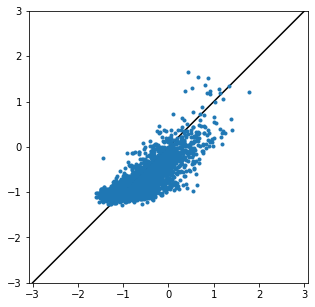

In [20]:
print("测试标准差STD=",np.std(pred_test_all-test_y.ravel()))
print("测试误差均值MEAN=",np.mean(pred_test_all-test_y.ravel()))
print("测试平均绝对误差MAE=",metrics.mean_absolute_error(pred_test_all, test_y.ravel()))
print("测试RMSE=",metrics.mean_squared_error(pred_test_all, test_y.ravel())**0.5)
print("测试MAPE=",np.mean(np.abs((test_y.ravel() - pred_test_all) / test_y.ravel())) * 100)
print("测试r2 score:", r2_score(test_y.ravel(), pred_test_all))


plt.figure(figsize=(5, 5))
plt.axis('equal')

x3 = np.arange(-3, 3, 0.01)
y3=x3
plt.plot(x3, y3, "black")
plt.plot(test_y.ravel(),pred_test_all,'.')
plt.xlim(-3, 3)
plt.ylim(-3, 3)
plt.show()   

In [22]:
#########################保存测试结果####################################
pred_test_all=pred_test_all.reshape(pred_test_all.shape[0],1)

print(pred_test_all.shape)
print(test_y.shape)

te_result=np.concatenate((test_y,pred_test_all),axis=1)

print(te_result.shape)

data_te = pd.DataFrame(te_result) #将数组转换为dataframe结构
data_te.columns=['实际PGV','预测PGV']
#writer_te = pd.ExcelWriter(r'\PGVtest3.xls')   # 写入Excel文件

data_te.to_excel(writer_te,float_format='%.5f',index=False)   ## ‘page_1’是写入excel的sheet名
writer_te.save()
writer_te.close()
#########################保存测试结果####################################

(3614, 1)
(3614, 1)
(3614, 2)
